In [18]:
import numpy as np
import pandas as pd

In [19]:
codes = pd.read_csv('CodesTypes.csv', index_col='Id')
codes_tree = pd.read_csv('CodesTree.csv', index_col = 'Id').drop(columns=['Unnamed: 0'])
codes_par = pd.read_csv('CodesParagraphs.csv', index_col = 'Id', dtype = {'paragraph':'string'}).drop(columns=['Unnamed: 0'])
answers = pd.read_csv('Answers.csv').drop(columns = ['Unnamed: 0'])
questions = pd.read_csv('Questions.csv', index_col = 'Id')

In [20]:
codes_par.dropna(inplace=True)

In [21]:
answers.rename(columns = {'QuestionId':'question_id'}, inplace = True)
codes_par.rename(columns = {'Article_Id': 'article_id', 'Paragraph': 'paragraph'}, inplace = True)
codes_tree.rename(columns = {'CodesId': 'codes_id'}, inplace = True)

In [22]:
codes.drop(columns=['Unnamed: 0'], inplace = True)

In [23]:
codes.index = codes.index - 3 # нужно сделать, что совпадали идентификаторы кодексов в codes_tree

In [24]:
codes.loc[25]

Parent                                                    1
Name      Уголовно-исполнительный кодекс Российской Феде...
Name: 25, dtype: object

In [25]:
answers = answers[answers.Text.notna()]

In [26]:
answers.head()

,Rating,Name,Text,Datetime,question_id
0,4,Мурашко Владимир,Здравствуйте! Банк не сможет оспаривать дого...,30.01.2023 19:41:49,176810
1,5,Полникова Марина Николаевна,Здравствуйте! подскажите пожалуйста может ли ...,31.01.2023 10:14:53,176810
2,2,Охотников Кирилл Сергеевич,Дарение кому -либо кредита очень не частая в ю...,31.01.2023 10:40:14,176810
3,4,Алексей Владимирович,"Здравствуйте, Руслан! Да, будете. Если Вы пол...",30.01.2023 22:15:44,176809
4,1,Елена Михайловна,"Руслан, здравствуйте! Первым делом посмотрите...",31.01.2023 07:04:49,176809


In [27]:
codes = codes.loc[0:]

In [28]:
codes.loc[27]

Parent                                                1
Name      Уголовный кодекс Российской Федерации (УК РФ)
Name: 27, dtype: object

In [11]:
questions.head()

,Name,Datetime,Title,City,Categories,Answers,Text
Id,,,,,,,
176810,Валерий,30.01.2023 19:08:36,Может ли банк через суд оспорить договор дарения?,Мичуринск,"['Гражданское право', 'Кредит и займ']",3,Здравствуйте! У меня кредит больше 1.3 млн.р. ...
176809,Руслан,30.01.2023 19:07:04,Про отработка гранта после выпуска.,Алматы,['Образование'],2,"Здравствуйте! Я учусь в колледже, на 3 курсе в..."
176808,Валера,30.01.2023 14:17:47,Как получить ветерана боевых действий в ДНР?,Мкеевка,['Военная служба'],2,Как получить ветерана боевых действий? Комиссо...
176806,Екатерина,29.01.2023 19:30:37,Могут ли снять с денежного довольствия?,Донецк,['Военная служба'],3,Здравствуйте! После ВВК поставили категорию Г....
176804,Тата,29.01.2023 11:21:38,"Имеют ли право МФО заявлять в полицию, если пр...",Знаменка,"['Гражданское право', 'Кредит и займ']",6,"У меня просрочка в займе, займ написал заявлен..."


Для того, чтобы найти в тексте нужные кодексы, нам нужно получить их сокращенные варианты.
В конце каждой `codes.Name`, которая отвечает конечному кодексу, содержится такой сокращенный вариант в круглых скобках по следующему шаблону `Fullname ({ShortName})`.

Давайте извлечем это короткое имя

In [29]:
short_codes = filter(lambda x: x, codes.Name.str.findall('\([А-Я \d]+\)').values)
short_codes = list(map(lambda x: x[0][1:-1], short_codes))
print(short_codes)

['АПК РФ', 'БК РФ', 'ВК РФ', 'ГПК РФ', 'ЖК РФ', 'ЗК РФ', 'КАС РФ', 'ЛК РФ', 'СК РФ', 'ТК ЕАЭС', 'ТК ТС', 'ТК РФ', 'УИК РФ', 'УПК РФ', 'УК РФ', 'ЗОЗПП', 'АО', 'ООО', 'ОСАГО', 'ПДД', 'ПД']


In [30]:
print(len(short_codes))

21


Давайте теперь попробуем найти все ответы, в которых содержится указание на хотя бы один из нужных кодексов

In [31]:
target = 'Text'

In [32]:
short_codes_ptr = '(' +'|'.join(short_codes) + ')'
contain_sc = answers.Text.str.contains(short_codes_ptr, regex = True)
answ_codes = answers.loc[contain_sc[contain_sc].index].copy()

/tmp/ipykernel_6133/3581087905.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  contain_sc = answers.Text.str.contains(short_codes_ptr, regex = True)


Теперь узнаем сколько всего ответов содержат ссылки на кодексы, с учетом того, что вопросы различные

In [16]:
answ_codes[target] = answ_codes[target].str.lower()

In [17]:
print(f'Uniques {answ_codes.QuestionId.unique().shape}')
quest_ids = answ_codes.QuestionId.unique()

AttributeError: 'DataFrame' object has no attribute 'QuestionId'

In [ ]:
suit_quest = questions[questions.index.isin(quest_ids)].copy()

Давайте попробуем теперь из всех тех ответов, где есть ссылки на различные кодексы, найти ссылки на статьи.

Сделаем предположение, что ссылка на статью выглядит одним из следующих способов:
1. "... статья {`d` слов справа}";
    2. слово `статья` в различных падежах;
2. "... cт{.+} {`d` слов справа}";
3. "... с{.+} {`d` слов справа}".


In [33]:
import nltk
import pymorphy2
import string
import re
from Supportive import snlp
from importlib import reload
from collections import Counter
import seaborn as sns
import math

In [34]:
reload(snlp)
pass

In [16]:
all_art_cases = ['статьей']+list(snlp.get_all_word_case('статья'))
reg_article = '([^а-я]' + '(' + '|'.join(all_art_cases+['c[\. ]+', 'ст[. ]']) + ')'
right_count = 6
reg_article += '(( |,)[а-я\d.]*){0,'+str(right_count)+'})'
reg_article = re.compile(reg_article)
reg_article

re.compile(r'([^а-я](статьей|статьи|статьёй|статья|статье|статью|c[\. ]+|ст[. ])(( |,)[а-я\d.]*){0,6})',
           re.UNICODE)

In [17]:
answ_art = answ_codes[target].str.contains(reg_article, regex=True)
answ_art = answ_codes.loc[answ_codes[target].loc[answ_art].index].copy()
answ_art.shape

/tmp/ipykernel_6843/1799238598.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  answ_art = answ_codes[target].str.contains(reg_article, regex=True)


(7078, 5)

Как мы видим, практически в каждом ответе, где указывался кодекс, содержится статья, на которую ссылается юрист. Давайте теперь соберем все строки текстов со словом статья и `right_count` правых слов, стоящих справа, дабы:
1. Понять, что за слова справа от этих слов 
2. Оценить, как построить регулярное выражение, чтобы забрать номер статьи

In [95]:
art_words = answ_art[target].str.extractall(reg_article)#.apply(lambda x: ' '.join(x.values.astype(str)),axis=1)

In [96]:
art_words.head()

0       1  \
   match                                                              
13 0                                                 статья  статья   
   1       статья 159.1. мошенничество в сфере кредитова...  статья   
14 0       статья 24. основания отказа в возбуждении уго...  статья   
   1                         статье 159.1 ук рф.  для целей  статье   
   2           статьи 159.1 ук рф заемщиком признается лицо  статьи   

                    2    3  
   match                    
13 0              NaN  NaN  
   1                        
14 0       уголовного       
   1            целей       
   2             лицо

In [97]:
art_words = art_words[[0]].astype({0:'string'})
art_words.rename(columns={0:'article'},inplace=True)

In [98]:
expr_one_word = art_words['article'].str.split(' ').str.len()==2
expr_one_word.sum()

2051

In [246]:
ids_art_words = expr_one_word.loc[~expr_one_word].index
art_words = art_words.loc[ids_art_words]

In [247]:
art_words

article
      match                                                   
13    1       статья 159.1. мошенничество в сфере кредитова...
14    0       статья 24. основания отказа в возбуждении уго...
      1                         статье 159.1 ук рф.  для целей
      2           статьи 159.1 ук рф заемщиком признается лицо
      3                 статье 159.1 ук рф может являться банк
...                                                        ...
42282 0                               ст. 12.8, ч. 1 ст. 12.26
      1                                      ст. 12.27 коап рф
42316 0       статья 65. осуществление родительских прав 1....
42320 0                         статья 158. кража 1. кража, то
      1                       статьей 159.3 настоящего кодекса

[23867 rows x 1 columns]

In [101]:
def number_right_word(x):
    words = x[1:]
    dict_num_word = dict.fromkeys(range(1, right_count + 1))
    for i, word in enumerate(words, start = 1):
        dict_num_word[i] = word
    return dict_num_word

In [102]:
num_right_word = pd.DataFrame(list(art_words.article.str.split(' ').apply(number_right_word).values))

In [103]:
num_right_word.value_counts()

1        2               3               4               5          6                 7        
статьей  372             настоящего      кодекса         для        принятия          локальных    65
статья   119.            изменение       установленного  судом      размера           алиментов    63
         203.            отсрочка        или             рассрочка  исполнения        решения      58
         55.             доказательства                  1.         доказательствами  по           57
         129.            отмена          судебного       приказа                      при          48
                                                                                                   ..
ст.      446             гпк             рф.             согласно   данной            статьи        1
                                                         если       списали           деньги        1
                                                         а          вот               чт

Let's check, how much number of articles at second column

In [209]:
total_freq = 0
for num in range(2, right_count + 2):
    freq_num_digits = num_right_word[num].str.match('\d').sum()/num_right_word.shape[0]
    total_freq += freq_num_digits
    print(f'Frequency of {num-1} word from name `article` is digits is equal: ', freq_num_digits)

print(f'Total frequancy of digits in first {right_count}-th right words: ', total_freq)

Frequency of 1 word from name `article` is digits is equal:  0.8497926006620019
Frequency of 2 word from name `article` is digits is equal:  0.020069552101227635
Frequency of 3 word from name `article` is digits is equal:  0.03858884652448988
Frequency of 4 word from name `article` is digits is equal:  0.03234591695646709
Frequency of 5 word from name `article` is digits is equal:  0.05543218670130305
Frequency of 6 word from name `article` is digits is equal:  0.03087945699082415
Total frequancy of digits in first 6-th right words:  1.0271085599363137


It says, that we might extract number of article in first 6-th words

## Extract numbers of articles for each question

In [12]:
from Supportive import spdf

In [200]:
reload(spdf)
pass

In [201]:
mi = pd.MultiIndex.from_tuples([(1, 2), (1,3), (3, 4), (5, 6)])
tdf = pd.DataFrame([(1,1), (1, 1), (1,1), (2,3),], index = mi)
tdf.index.get_level_values(0)
print(spdf.drop_duplicates_by_index(tdf, columns = [0]))

     0
1 2  1
3 4  1
5 6  2


In [202]:
reg_art_num = re.compile('(\d+(\.*\d)*)')

In [203]:
answ_art_num = spdf.drop_duplicates_by_index(art_words.article.str.extract(reg_art_num), columns = [0])

In [344]:
answ_art_num = answ_art_num.loc[answ_art_num[0].loc[~answ_art_num[0].isna()].index]

In [345]:
answ_art_num

0
      match       
13    1      159.1
14    0         24
      1      159.1
      4        819
22    0        2.1
...            ...
42282 0       12.8
      1      12.27
42316 0         65
42320 0        158
      1      159.3

[17285 rows x 1 columns]

### Extract codes name for each number of article

And now we should relate the codes names and number of article at each answer. But now we should check `left_count` left_words, because codes name writes before number of article

Let's do it, using check article name's in first `left_count` before number of article

Algorithm:

1. For each text of answer with article number we create regular expression which will extract right words with this number. (we can't create regex which fits for all texts, because texts contains dates, numbers of numbered lists)

2. With using function `pandas.DataFrame.apply` obtain words and return np.arrays with this left words

In [429]:
left_count = 6
answ_regex = '('+'(( |,|;|:)[а-я\d.]*)' + '{' + ',' + str(left_count) + '}'+answ_art_num[0] + ')'

In [430]:
answ_regex

       match
13     1        ((( |,|;|:)[а-я\d.]*){,6}159.1)
14     0           ((( |,|;|:)[а-я\d.]*){,6}24)
       1        ((( |,|;|:)[а-я\d.]*){,6}159.1)
       4          ((( |,|;|:)[а-я\d.]*){,6}819)
22     0          ((( |,|;|:)[а-я\d.]*){,6}2.1)
                             ...               
42282  0         ((( |,|;|:)[а-я\d.]*){,6}12.8)
       1        ((( |,|;|:)[а-я\d.]*){,6}12.27)
42316  0           ((( |,|;|:)[а-я\d.]*){,6}65)
42320  0          ((( |,|;|:)[а-я\d.]*){,6}158)
       1        ((( |,|;|:)[а-я\d.]*){,6}159.3)
Name: 0, Length: 17285, dtype: string

In [431]:
answ_art['AnswerId'] = answ_art.index

In [517]:
def obtain_left_words_before_number(x):
    key_val, key_id, key_qid = 'ArtString', 'AnswerId', 'QuestionId'
    
    idx = x[key_id]
    text = x[target]
    qidx = x[key_qid]
    
    cleaned_sub_art = {key_val: [], key_id: [], key_qid: []}
    if idx in answ_regex.index:
        regex_for_art = answ_regex.loc[idx]
        for sidx in regex_for_art.index:
            reg_expr = regex_for_art.loc[sidx]
            cleaned_str = re.search(reg_expr, text)[0].strip()
            cleaned_sub_art[key_val].append(cleaned_str)
            cleaned_sub_art[key_id].append(idx)
            cleaned_sub_art[key_qid].append(qidx)
    return pd.DataFrame(cleaned_sub_art).astype({key_id:int, key_qid:int})

def creat_df_left_words(df):
    df_left_words = None
    for idx in df.index:
        part_left_words = obtain_left_words_before_number(df.loc[idx])
        df_left_words = pd.concat([df_left_words, part_left_words])
    return df_left_words

In [518]:
answ_art_short = answ_art[[target, 'AnswerId', 'QuestionId']].copy()

In [538]:
art_left_words = creat_df_left_words(answ_art_short)

In [549]:
art_left_words.index = range(0, art_left_words.shape[0])

In [550]:
art_left_words

,ArtString,AnswerId,QuestionId
0,ук рф статья 159.1,13,176804
1,упк рф статья 24,14,176804
2,", подлежат квалификации по статье 159.1",14,176804
3,819,14,176804
4,из уголовного права. согласно ст. 2.1,22,176802
...,...,...,...
17280,"1, 4 ст. 12.8",42282,167259
17281,"12.26, ч. 3 ст. 12.27",42282,167259
17282,ребенка. ск рф статья 65,42316,167245
17283,своем. ук рф статья 158,42320,167243


In [551]:
answ_art.loc[14].Text

'здравствуйте!  расскажите мне пожалуйста детали и что в таком случае делать.  вам нужно явиться по вызову правоохранительных органов и дать необходимые объяснения. если в ваших действиях при взятии кредита не было мошеннических действий, то последует отказ в возбуждении уголовного дела.   упк рф статья 24. основания отказа в возбуждении уголовного дела или прекращения уголовного дела  1. уголовное дело не может быть возбуждено, а возбужденное уголовное дело подлежит прекращению по следующим основаниям:  1) отсутствие события преступления;  2) отсутствие в деянии состава преступления.  постановление пленума верховного суда рф от 30.11.2017 n 48 "о судебной практике по делам о мошенничестве, присвоении и растрате"  13. действия заемщика, состоящие в получении наличных либо безналичных денежных средств путем представления банку или иному кредитору заведомо ложных и (или) недостоверных сведений с целью безвозмездного обращения денежных средств в свою пользу или в пользу третьих лиц при за

In [552]:
re_short_codes_ptr = re.compile(short_codes_ptr.lower())
re_short_codes_ptr

re.compile(r'(апк рф|бк рф|вк рф|гпк рф|жк рф|зк рф|кас рф|лк рф|ск рф|тк еаэс|тк тс|тк рф|уик рф|упк рф|ук рф|зозпп|ао|ооо|осаго|пдд|пд)',
           re.UNICODE)

## Другой подход к получению нужных статей
Давайте подойдем с другой стороны.
Так как на данный момент датасет не очень большой, то для того, чтобы получить статьи и кодексы, можно сделать следующее:

1. Приведем все слова в тексте в нормальную форму
2. Далее, будем искать в тексте не только аббревиатуры, но и полные названия кодексов. Т.к. все слова в нормальной форме, единственном числе, именительном падеже, то, скорее всего, мы найдем их больше.
    1. Проблема может возникнуть в том, что мы не будем знать, где будет упомянут номер статьи, после кодекса или перед кодексом. Так как есть пример "в статье 132 ук рф" и "УК РФ статья 132". Но а там, мы уже можем смотреть на левый и правый контекст и пытаться получить оттуда номер, надеясь, что он там нормальный
3. Далее ищем номера статей, которые не так далеко лежат от названий кодексов

### 1. Приведем все слова в тексте в нормальную форму 

In [94]:
reload(snlp)
reload(spdf)
pass

In [35]:
from tqdm import tqdm

In [99]:
tqdm.pandas()
norm_apply = spdf.dec_df_apply(snlp.text_norm, target = 'Text')
norm_answers = answers.progress_apply(norm_apply, axis = 1)

100%|███████████████████████████████████| 42317/42317 [1:47:03<00:00,  6.59it/s]


In [100]:
norm_answers.to_csv('norm_answers.csv')

In [101]:
norm_answers

,Rating,Name,Text,Datetime,QuestionId
0,4,Мурашко Владимир,здравствуйте ! банк не смочь оспаривать догово...,30.01.2023 19:41:49,176810
1,5,Полникова Марина Николаевна,здравствуйте ! подсказать пожалуйста мочь ли б...,31.01.2023 10:14:53,176810
2,2,Охотников Кирилл Сергеевич,дарение кто -либо кредит очень не частый в юри...,31.01.2023 10:40:14,176810
3,4,Алексей Владимирович,"здравствуйте , руслан ! да , быть . если вы по...",30.01.2023 22:15:44,176809
4,1,Елена Михайловна,"руслан , здравствуйте ! первый дело посмотреть...",31.01.2023 07:04:49,176809
...,...,...,...,...,...
42319,4,Алексей Владимирович,"здравствуйте , алёна ! пока вы находиться в от...",01.07.2020 10:39:46,167244
42320,3,Марина Олеговна,здравствуйте к сожаление мочь быть всякий . но...,01.07.2020 01:43:15,167243
42321,5,Роза Мударисовна,"здравствуйте если вы не знать , что это чужой ...",01.07.2020 09:19:57,167243
42322,3,Попов Игорь Олегович,всё мочь быть . это позиция обвинение . у вы п...,06.07.2020 22:57:17,167243


С другой стороны можно было бы это сделать по-другому, предприняв подход, который был использован до этого:
1. Создать регулярки с разными формами и сочитаниями слов кодексов и статей (8*21=168, часть из них не очень корректны, поэтому нужно было бы либо сидеть и ручками размечать, какие пары могут сочитаться, какие нет, где слово обозначающее статью перед кодексом, а где после)

Во-первых, нормализованные строки могут содержать статью и кодекс в следующем виде:
1. `статья {число} {кодекс}`
2. `{кодекс} статья {число}`
3. `статья {число} {имя статьи} {кодекс}`

Как мне кажется, юристы часто пишут именно так, хотя, возможно, может быть такое написание:
1. `эта статья {номер}, регулирующая {текст}, {кодекс}`

## 2. Найдём названия кодексов совместно с номером статей

In [20]:
target = 'Text'

In [25]:
reload(snlp)
pass

In [21]:
full_codes = filter(lambda x: x, codes.Name.str.findall('([^\(\)]+)').values)
full_codes = list(map(lambda x: x[0].lower(), full_codes))
full_codes = [re.escape(snlp.text_norm(codes)) for codes in full_codes]
print(full_codes)

['конституция', 'кодекс', 'закон\\ ,\\ нормативный\\ акт\\ ,\\ справочный\\ материал', 'конституция\\ российский\\ федерация', 'арбитражный\\ процессуальный\\ кодекс\\ российский\\ федерация', 'бюджетный\\ кодекс\\ российский\\ федерация', 'водный\\ кодекс\\ российский\\ федерация', 'воздушный\\ кодекс\\ российский\\ федерация', 'градостроительный\\ кодекс\\ российский\\ федерация', 'гражданский\\ кодекс\\ российский\\ федерация\\ \\-\\ часть\\ первый', 'гражданский\\ кодекс\\ российский\\ федерация\\ \\-\\ часть\\ второй', 'гражданский\\ кодекс\\ российский\\ федерация\\ \\-\\ часть\\ третий', 'гражданский\\ кодекс\\ российский\\ федерация\\ \\-\\ часть\\ четвёртый', 'гражданский\\ процессуальный\\ кодекс\\ российский\\ федерация', 'жилищный\\ кодекс\\ российский\\ федерация', 'земельный\\ кодекс\\ российский\\ федерация', 'кодекс\\ административный\\ судопроизводство\\ российский\\ федерация', 'кодекс\\ закон\\ о\\ труд', 'трудовой\\ кодекс\\ российский\\ федерация', 'кодекс\\ россий

In [26]:
all_codes = full_codes + short_codes
codes_find = re.compile('(' +'|'.join(all_codes) + ')', re.IGNORECASE)

In [27]:
all_codes

['конституция',
 'кодекс',
 'закон\\ ,\\ нормативный\\ акт\\ ,\\ справочный\\ материал',
 'конституция\\ российский\\ федерация',
 'арбитражный\\ процессуальный\\ кодекс\\ российский\\ федерация',
 'бюджетный\\ кодекс\\ российский\\ федерация',
 'водный\\ кодекс\\ российский\\ федерация',
 'воздушный\\ кодекс\\ российский\\ федерация',
 'градостроительный\\ кодекс\\ российский\\ федерация',
 'гражданский\\ кодекс\\ российский\\ федерация\\ \\-\\ часть\\ первый',
 'гражданский\\ кодекс\\ российский\\ федерация\\ \\-\\ часть\\ второй',
 'гражданский\\ кодекс\\ российский\\ федерация\\ \\-\\ часть\\ третий',
 'гражданский\\ кодекс\\ российский\\ федерация\\ \\-\\ часть\\ четвёртый',
 'гражданский\\ процессуальный\\ кодекс\\ российский\\ федерация',
 'жилищный\\ кодекс\\ российский\\ федерация',
 'земельный\\ кодекс\\ российский\\ федерация',
 'кодекс\\ административный\\ судопроизводство\\ российский\\ федерация',
 'кодекс\\ закон\\ о\\ труд',
 'трудовой\\ кодекс\\ российский\\ федерация'

In [28]:
full_codes[-20]

'федеральный\\ закон\\ "\\ о\\ обязательный\\ социальный\\ страхование\\ от\\ несчастный\\ случай\\ на\\ производство\\ и\\ профессиональный\\ заболевание\\ "\\ n\\ 125\\-фз'

In [29]:
reg_patterns = ['статья \d+\.{0,1}\d*', 'статья([а-я ])+ \d+\.{0,1}\d*', 'c[\. ]+\d+\.{0,1}\d*', 'ст[\. ]+\d+\.{0,1}\d*']
all_patterns = snlp.get_two_list_permutations(all_codes, reg_patterns)
codes_ptr = re.compile('(' +'|'.join(all_patterns) + ')', re.IGNORECASE)

In [209]:
codes_ptr

re.compile(r'(статья \d+\.{0,1}\d* конституция|статья \d+\.{0,1}\d* кодекс|статья \d+\.{0,1}\d* закон\ ,\ нормативный\ акт\ ,\ справочный\ материал|статья \d+\.{0,1}\d* конституция\ российский\ федерация|статья \d+\.{0,1}\d* арбитражный\ процессуальный\ кодекс\ российский\ федерация|статья \d+\.{0,1}\d* бюджетный\ кодекс\ российский\ федерация|статья \d+\.{0,1}\d* водный\ кодекс\ российский\ федерация|статья \d+\.{0,1}\d* воздушный\ кодекс\ российский\ федерация|статья \d+\.{0,1}\d* градостроительный\ кодекс\ российский\ федерация|статья \d+\.{0,1}\d* гражданский\ кодекс\ российский\ федерация\ \-\ часть\ первый|статья \d+\.{0,1}\d* гражданский\ кодекс\ российский\ федерация\ \-\ часть\ второй|статья \d+\.{0,1}\d* гражданский\ кодекс\ российский\ федерация\ \-\ часть\ третий|статья \d+\.{0,1}\d* гражданский\ кодекс\ российский\ федерация\ \-\ часть\ четвёртый|статья \d+\.{0,1}\d* гражданский\ процессуальный\ кодекс\ российский\ федерация|статья \d+\.{0,1}\d* жилищный\ кодекс\ российски

In [157]:
norm_answers.loc[1].Text

'здравствуйте ! подсказать пожалуйста мочь ли банк через суд оспорить договор дарение ? в рамка задолженность по кредит кредитор не мочь оспорить сделка по дарение недвижимость . перечень основание для отмена дарение предусмотреть ниже . гк рф статья 578 . отмена дарение 1 . даритель вправе отменить дарение , если одарять совершить покушение на он жизнь , жизнь кто-либо из член он семья или близкий родственник либо умышленно причинить даритель телесный повреждение . в случай умышленный лишение жизнь даритель одарять право требовать в суд отмена дарение принадлежать наследник даритель . 2 . даритель вправе потребовать в судебный порядок отмена дарение , если обращение одарять с подарить вещь , представлять для даритель больший неимущественный ценность , создавать угроза она безвозвратный утрата . 3 . по требование заинтересованный лицо суд мочь отменить дарение , совершенный индивидуальный предприниматель или юридический лицо в нарушение положение закон о несостоятельность ( банкротство

In [210]:
%%time
answers_articles_with_na = norm_answers[target].str.findall(codes_ptr)

CPU times: user 19min 15s, sys: 6.42 s, total: 19min 22s
Wall time: 19min 12s


In [211]:
answers_articles_with_na.to_csv('answers_articles_with_na.csv')

In [274]:
answers_articles_mask = (answers_articles_with_na.str.len()>0)
answers_articles = answers_articles_with_na.loc[answers_articles_mask]
answers_articles.head()

13    [(ук рф статья 159.1, , , , , , , , , , , , , ...
14    [(упк рф статья 24, , , , , , , , , , , , , , ...
26    [(ст . 40 ук рф, , , , , , , , , , , , , , , ,...
27    [(статья 40 ук рф, , , , , , , , , , , , , , ,...
43    [(ст . 44 жк рф, , , , , , , , , , , , , , , ,...
Name: Text, dtype: object

In [275]:
tqdm.pandas()
def apply_filter(x):
    output = []
    for sub_list in x:
        output.extend(list(filter(lambda substr: len(substr) > 1, sub_list)))
    return output

answers_articles = answers_articles.progress_apply(apply_filter)

100%|████████████████████████████████████| 7147/7147 [00:00<00:00, 17401.46it/s]


In [276]:
answers_articles
#Let answer_articles should have MultiIndex
#Where index is (answer_id, str for article)
mi_answers_article = None
for idx in answers_articles.index:
    key_article_ref = 'article_reference'
    key_article_id1 = 'ArticleId'
    key_article_id2 = 'reference_id'
    new_table = {key_article_ref: [], key_article_id1: [], key_article_id2: []}
    for i, article_ref in enumerate(answers_articles.loc[idx]):
        new_table[key_article_ref].append(article_ref)
        new_table[key_article_id1].append(idx)
        new_table[key_article_id2].append(i)
    
    new_table = pd.DataFrame(new_table)
    mi_answers_article = pd.concat([mi_answers_article, new_table])

answers_articles =  mi_answers_article.set_index(['ArticleId', 'reference_id'])
answers_articles = spdf.drop_duplicates_by_index(answers_articles, columns = [key_article_ref])

In [310]:
answers_articles.head()

article_reference
ArticleId reference_id                    
13        0             ук рф статья 159.1
14        0               упк рф статья 24
          1             статья 159.1 ук рф
26        0                  ст . 40 ук рф
          1                  ст . 39 ук рф

In [40]:
answers_articles['article_id'] = answers_articles.article_reference.str.findall('\d+\.{0,1}\d*')\
                                  .apply(lambda x: x[0]).values
answers_articles['codes_id'] = answers_articles.article_reference.str.findall(codes_find).apply(lambda x: x[0]).values

aa_indeces = answers_articles.index.get_level_values(0).unique()
all_suitable_questions = answers.loc[aa_indeces, 'QuestionId'].unique() 

print('Total count of suitable answers: ', aa_indeces.shape[0]) 
print('Total count of suitable questions: ', all_suitable_questions.shape[0])

Total count of suitable answers:  7147
Total count of suitable questions:  3512


In [52]:
answers_articles.index.set_names({'ArticleId': 'answer_id'}, inplace = True)

In [54]:
answers_articles.to_csv('answers_articles.csv')

In [7]:
answers_articles = pd.read_csv('answers_articles.csv', index_col = ['answer_id', 'reference_id'], dtype = {'article_id': str})

In [8]:
answers_articles

article_reference  \
answer_id reference_id                                                    
13        0                                          ук рф статья 159.1   
14        0                                            упк рф статья 24   
          1                                          статья 159.1 ук рф   
26        0                                               ст . 40 ук рф   
          1                                               ст . 39 ук рф   
...                                                                 ...   
42276     4                                              ст . 157 тк рф   
42277     0             статья 299 трудовой кодекс российский федерация   
42316     0                                             ск рф статья 65   
42320     0                                            ук рф статья 158   
42323     0             ст . 29 закон рф " о защита право потребитель "   

                       article_id                                 codes_id  
answer_id reference_id                                                      
13        0                 159.1                                    ук рф  
14        0                    24                                   упк рф  
          1                 159.1                                    ук рф  
26        0                    40                                    ук рф  
          1                    39                                    ук рф  
...                           ...                                      ...  
42276     4                   157                                    тк рф  
42277     0                   299     трудовой кодекс российский федерация  
42316     0                    65                                    ск рф  
42320     0                   158                                    ук рф  
42323     0                    29  закон рф " о защита право потребитель "  

[12794 rows x 3 columns]

In [322]:
questions.index.isin(all_suitable_questions)

array([False, False, False, ..., False,  True,  True])

In [320]:
suit_questions = questions[questions.index.isin(all_suitable_questions)].copy()

In [349]:
suit_questions.to_csv('suit_questions.csv')

In [9]:
suit_questions = pd.read_csv('suit_questions.csv', index_col = 'Id')

In [10]:
suit_questions

,Name,Datetime,Title,City,Categories,Answers,Text
Id,,,,,,,
176804,Тата,29.01.2023 11:21:38,"Имеют ли право МФО заявлять в полицию, если пр...",Знаменка,"['Гражданское право', 'Кредит и займ']",6,"У меня просрочка в займе, займ написал заявлен..."
176802,Ирина,28.01.2023 18:24:09,Из-за угроз в мой адрес я совершила администра...,Республика Удмуртия,['Административное право'],7,Из-за угроз в мой адрес я совершила администра...
176798,Юлия,27.01.2023 14:45:43,Кто должен смотреть за дорогой на придомовой т...,"с. Подозерский, Ивановская обл","['Жилищное право', 'Квартплата, квитанции, опл...",8,Здравствуйте! Многоквартирный дом с самоуправл...
176797,максим,27.01.2023 11:47:01,Как подать правильно заявление в суд на прекра...,мзырь,"['Жилищное право', 'Квартплата, квитанции, опл...",5,Доброго вам дня. Меня зовут Бычков Максим Влад...
176794,Александр,26.01.2023 23:38:21,Проходим ли по критериям молодой семьи?,Ноябрьск,"['Жилищное право', 'Получение жилья (квартиры)']",6,Здравствуйте! Я с супругой в браке менее года....
...,...,...,...,...,...,...,...
167266,Аноним,02.07.2020 14:30:22,Звонят кредиторы по долгу подруги т.к. я подтв...,Кировоград,"['Гражданское право', 'Кредит и займ']",6,Здравствуйте! У меня проблема: моя знакомая вз...
167262,Алексей,02.07.2020 11:16:26,"Пандемия, обсервация, оплата, вахтовый метод р...",Ноябрьск,['Трудовое право'],4,"Здравствуйте! Работаю вахтовым методом, из-за ..."
167245,Pavel,01.07.2020 05:55:14,"Взыскать штраф с матери за то, что она не дает...",Tula,['Административное право'],4,Статья 5.35 КоАП п2.2. Нарушение родителями ил...


### Преобразование признаков в идентификаторы других таблицы

Давайте сделаем последнее преобразованиие, а именно:

1. Вместо текста кодекса поставим его идентификатор в таблице `codes`;
2. Вместо текста статьи поставим её идентификатор в таблие `codes_tree`;

И уже с использованием этой таблицы мы можем построить torch DataSet  


####   Идентификатор таблицы  codes

1. Нормализуем имена
2. Пройдем по каждому кодексу из `all_codes`:
    1. Найдем `codes.Id` по кодексу;
    2. У всех столбов `answers_article.codes_id`, в которых есть данное имя мы заменим на `codes.Id`;
3. Изменим тип идентификатора `answers_article.codes_id` на int

In [16]:
tqdm.pandas()
norm_apply = spdf.dec_df_apply(snlp.text_norm, target = 'Name')
norm_codes = codes.loc[0:].progress_apply(norm_apply, axis = 1)

100%|█████████████████████████████████████████| 112/112 [00:09<00:00, 11.22it/s]


In [17]:
temp_answers_articles = answers_articles.copy() 

In [28]:
def change_codes_id(temp_answers_articles, cur_codes, codes_id):
    try:
        codes_id_mask = temp_answers_articles.codes_id.str.match(cur_codes).fillna(False)
        temp_answers_articles.loc[codes_id_mask, 'codes_id'] = codes_id
    except Exception as e:
        print(e)

In [29]:
for cur_codes in all_codes:
    cur_codes = cur_codes.lower()
    name_mask = norm_codes.Name.str.findall(f'([^\w]{cur_codes}|^{cur_codes})').str.len()>0
    if norm_codes.Name[name_mask].index.values.shape[0]:
        codes_id = norm_codes.Name[name_mask].index.values.min()
        change_codes_id(temp_answers_articles, cur_codes, codes_id)

Can only use .str accessor with string values!


In [31]:
norm_codes.Name[27]

'уголовный кодекс российский федерация ( ук рф )'

In [33]:
temp_answers_articles

article_reference  \
answer_id reference_id                                                    
13        0                                          ук рф статья 159.1   
14        0                                            упк рф статья 24   
          1                                          статья 159.1 ук рф   
26        0                                               ст . 40 ук рф   
          1                                               ст . 39 ук рф   
...                                                                 ...   
42276     4                                              ст . 157 тк рф   
42277     0             статья 299 трудовой кодекс российский федерация   
42316     0                                             ск рф статья 65   
42320     0                                            ук рф статья 158   
42323     0             ст . 29 закон рф " о защита право потребитель "   

                       article_id codes_id  
answer_id reference_id                      
13        0                 159.1       27  
14        0                    24       26  
          1                 159.1       27  
26        0                    40       27  
          1                    39       27  
...                           ...      ...  
42276     4                   157       24  
42277     0                   299       15  
42316     0                    65       20  
42320     0                   158       27  
42323     0                    29       28  

[12794 rows x 3 columns]

In [34]:
temp_answers_articles.codes_id.unique()

array([27, 26, 11, 24, 15, 20, 10, 0, 25, 1, 12, 13, 28, 105, 21, 2, 89,
       57, 86, 49, 3, 5, 17, 4], dtype=object)

In [311]:
change_codes_id(temp_answers_articles, 'конституция', 0)

In [41]:
temp_answers_articles.codes_id.unique()

array([27, 26, 11, 24, 15, 20, 10, 0, 25, 1, 12, 13, 28, 105, 21, 2, 89,
       57, 86, 49, 3, 5, 17, 4], dtype=object)

In [42]:
# codes_id_mask_drop = temp_answers_articles.codes_id.str.findall(f'([^\w]кодекс|^кодекс)').str.len()>0

In [43]:
filtered_answers_articles=temp_answers_articles#[~codes_id_mask_drop]

In [44]:
filtered_answers_articles.to_csv('filtered_answers_articles.cs')

####  Поставим идентификаторы статей

1. Возьмем все поля из `filtered_answers_articles.article_id,filtered_answers_articles.сodes_id`
2. Пробежим по всем  `article_id,codes_id`
    1. Найдем все `articles` из `codes_tree`, где `codes_tree.CodesId`=`codes_id`
    2. Из выбранных найдем те статьи, где содержится  `article_id`
    3. Заменим `article_id` на тот, который содержится в `codes_tree.CodesId` 

In [45]:
codes.loc[27]

Parent                                                1
Name      Уголовный кодекс Российской Федерации (УК РФ)
Name: 27, dtype: object

In [46]:
temp_answers_articles = filtered_answers_articles.copy()
wrong_ids = []
for aid in tqdm(filtered_answers_articles.index):
    cur_article_id, codes_id = temp_answers_articles.loc[aid, ['article_id', 'codes_id']]
    particular_codes = codes_tree[codes_tree.codes_id == codes_id]
    cur_article_id_mask  = particular_codes.Name.str.findall(cur_article_id).str.len()>0
    try:
        new_article_id = particular_codes.Name[cur_article_id_mask].index.values.min()
        temp_answers_articles.loc[aid, 'article_id'] = new_article_id
    except Exception as e:
        wrong_ids.append(aid)
#         print(e)
#         print(cur_article_id, codes_id)

100%|████████████████████████████████████| 12794/12794 [00:27<00:00, 467.57it/s]


In [47]:
temp_answers_articles

article_reference  \
answer_id reference_id                                                    
13        0                                          ук рф статья 159.1   
14        0                                            упк рф статья 24   
          1                                          статья 159.1 ук рф   
26        0                                               ст . 40 ук рф   
          1                                               ст . 39 ук рф   
...                                                                 ...   
42276     4                                              ст . 157 тк рф   
42277     0             статья 299 трудовой кодекс российский федерация   
42316     0                                             ск рф статья 65   
42320     0                                            ук рф статья 158   
42323     0             ст . 29 закон рф " о защита право потребитель "   

                       article_id codes_id  
answer_id reference_id                      
13        0                 159.1       27  
14        0                 10678       26  
          1                 159.1       27  
26        0                    40       27  
          1                    39       27  
...                           ...      ...  
42276     4                  9659       24  
42277     0                  5647       15  
42316     0                  8097       20  
42320     0                   158       27  
42323     0                 10767       28  

[12794 rows x 3 columns]

In [48]:
len(wrong_ids)

2374

В проблемных статьях можно разобраться. Например, 3907, скорее всего означает 390.7 стаью 10-го кодекса.
Давайте, чтобы не тратить время на все эти случаи, просто исклюим их из исходной таблицы

In [49]:
temp_answers_articles = temp_answers_articles[~temp_answers_articles.index.isin(wrong_ids)]

In [50]:
final_answers = temp_answers_articles

In [51]:
final_answers = final_answers.reset_index('reference_id')

Давайте произведем еще одно последнее преобразование, а именно соединим `answers` таблицу с `questions`. Это нужно нам для того, чтобы при создании тестовой и тренировочной выборки мы могли легче сделать разбиение таким образом, чтобы вопросы, которые находятся в тренировочной выборке не попали в тестовую (иначе наша модель просто будет иметь информацию об ответе)

In [64]:
df_art_to_par = codes_par.groupby('article_id').agg({'paragraph': ' '.join})
answers['answer_id'] = answers.index
        
#relation with answer, which needed to obtain question text
join_question_bridge = final_answers.join(answers,on = 'answer_id', how = 'left')[list(final_answers.columns) + ['question_id']]
#relation with questions to obtain text of questions
final_answers = join_question_bridge.set_index('question_id').join(questions, on='question_id')

In [68]:
final_answers.to_csv('final_answers.csv')

In [37]:
final_answers = pd.read_csv('final_answers.csv', index_col = 'question_id')

In [38]:
final_answers

,reference_id,article_reference,article_id,codes_id,Name,Datetime,Title,City,Categories,Answers,Text
question_id,,,,,,,,,,,
176804,0,упк рф статья 24,10678,26,Тата,29.01.2023 11:21:38,"Имеют ли право МФО заявлять в полицию, если пр...",Знаменка,"['Гражданское право', 'Кредит и займ']",6,"У меня просрочка в займе, займ написал заявлен..."
176798,0,ст . 44 жк рф,4047,11,Юлия,27.01.2023 14:45:43,Кто должен смотреть за дорогой на придомовой т...,"с. Подозерский, Ивановская обл","['Жилищное право', 'Квартплата, квитанции, опл...",8,Здравствуйте! Многоквартирный дом с самоуправл...
176798,1,ст . 164 жк рф,4212,11,Юлия,27.01.2023 14:45:43,Кто должен смотреть за дорогой на придомовой т...,"с. Подозерский, Ивановская обл","['Жилищное право', 'Квартплата, квитанции, опл...",8,Здравствуйте! Многоквартирный дом с самоуправл...
176798,0,ст . 164 жк рф,4212,11,Юлия,27.01.2023 14:45:43,Кто должен смотреть за дорогой на придомовой т...,"с. Подозерский, Ивановская обл","['Жилищное право', 'Квартплата, квитанции, опл...",8,Здравствуйте! Многоквартирный дом с самоуправл...
176798,0,жк рф статья 164,4212,11,Юлия,27.01.2023 14:45:43,Кто должен смотреть за дорогой на придомовой т...,"с. Подозерский, Ивановская обл","['Жилищное право', 'Квартплата, квитанции, опл...",8,Здравствуйте! Многоквартирный дом с самоуправл...
...,...,...,...,...,...,...,...,...,...,...,...
167262,3,ст . 220 тк рф,9728,24,Алексей,02.07.2020 11:16:26,"Пандемия, обсервация, оплата, вахтовый метод р...",Ноябрьск,['Трудовое право'],4,"Здравствуйте! Работаю вахтовым методом, из-за ..."
167262,4,ст . 157 тк рф,9659,24,Алексей,02.07.2020 11:16:26,"Пандемия, обсервация, оплата, вахтовый метод р...",Ноябрьск,['Трудовое право'],4,"Здравствуйте! Работаю вахтовым методом, из-за ..."
167262,0,статья 299 трудовой кодекс российский федерация,5647,15,Алексей,02.07.2020 11:16:26,"Пандемия, обсервация, оплата, вахтовый метод р...",Ноябрьск,['Трудовое право'],4,"Здравствуйте! Работаю вахтовым методом, из-за ..."


Ура!
Теперь у нас есть конечная таблица, со ссылками на:
1. Идентификатор статьи
2. Идентификатор кодекса
3. Идентификатор ответа
4. Можем найти идентификатор вопроса (Идентификатор ответа имеет ссылку через таблицу `answers` на идентификатор вопроса)

#### Идентификатор таблицы codes_tree

## Исследование подходящих вопросов
Прежде чем переходить к построению модели, давайте посмотрим на некоторые статистики нашего текста, а именно:
1. Посмотрим статистику по длинам
2. Посмотрим статистику по популярным словам
3. Посмотрим статистику по поплуярным словам за вычетом мусорных слов

In [232]:
from Supportive import spdf

In [233]:
from collections import Counter
import razdel

In [234]:
suit_questions.Text.str.len().describe()

count    3528.000000
mean      394.039399
std       364.242007
min        26.000000
25%       177.000000
50%       291.000000
75%       473.250000
max      4947.000000
Name: Text, dtype: float64

In [235]:
suit_quest_clean = suit_questions.apply(spdf.dec_tokenization_columns(['Text']), axis = 1)
all_concat_questions = '\n'.join(suit_quest_clean.Text.values)

In [236]:
total_tokenization = [elem.text for elem in razdel.tokenize(all_concat_questions)]
token_stats = {word: count for word, count in sorted(Counter(total_tokenization).items(), key = lambda x: x[1], reverse = True)}

In [237]:
print(token_stats)

{'в': 7498, 'и': 5415, 'на': 5017, 'не': 4550, 'я': 2969, 'с': 2757, 'что': 2625, 'по': 2474, 'ли': 2055, 'Здравствуйте': 1550, 'меня': 1534, 'мне': 1464, 'за': 1338, 'как': 1254, 'у': 1140, 'Я': 1000, 'это': 918, 'В': 917, 'но': 912, 'о': 845, 'он': 843, 'от': 822, 'а': 766, 'к': 740, 'лет': 671, 'его': 670, 'года': 666, 'если': 655, 'так': 642, 'суд': 631, 'или': 608, 'есть': 602, 'день': 554, '2': 550, 'нет': 542, 'то': 516, 'все': 516, 'она': 505, 'из': 501, 'до': 500, 'Как': 490, 'был': 487, 'У': 484, 'И': 470, 'чтобы': 465, 'было': 459, 'для': 458, 'Добрый': 439, 'заявление': 438, 'уже': 433, 'будет': 431, 'же': 423, 'мы': 423, 'г': 415, 'т': 408, '3': 403, 'после': 400, 'пожалуйста': 397, 'делать': 397, 'при': 395, 'без': 393, 'только': 389, 'можно': 368, 'деньги': 367, 'могу': 361, 'Что': 356, '1': 352, 'они': 349, 'была': 349, 'быть': 346, 'году': 345, 'На': 345, 'через': 342, 'квартиру': 331, 'Но': 324, 'алименты': 324, 'работу': 324, 'время': 317, 'этом': 312, 'детей': 308, 

Теперь давайте из каждого текста отберем только значащие слова.
Для этого воспользуемся таким извлечением значащих признаков как IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
corpus = suit_quest_clean.Text.values
vectorizer = TfidfVectorizer()
fx = vectorizer.fit_transform(corpus)
quest_features = vectorizer.get_feature_names_out()

In [18]:
suit_quest_clean.Text.values[302]

'Нанёс человеку 1 удар сломал челюсть и выбил зуб Что грозит'

#### Let's create dataframe in which contained CodesType, ArticleNumber in Codes, AnswerId, Question ID.
We will use this dataframe for obtain `y` value for predictions

In [589]:
extracted_codes = art_left_words.ArtString.str.extract(re_short_codes_ptr)
extracted_codes = extracted_codes[0][extracted_codes.notna()[0]]
art_left_words

In [591]:
art_left_words.loc[extracted_codes.index]

,ArtString,AnswerId,QuestionId
0,ук рф статья 159.1,13,176804
1,упк рф статья 24,14,176804
6,и упк рф. статья 49,25,176802
17,жк рф статья 164,50,176798
18,жк рф статья 168,50,176798
...,...,...,...
17264,тк рф статья 138,42234,167279
17269,инспекцию. тк рф статья 138,42237,167279
17270,разделу. ск рф статья 39,42259,167269
17282,ребенка. ск рф статья 65,42316,167245


In [215]:
re_short_codes_ptr = re.compile(short_codes_ptr, re.IGNORECASE)
total_freq = art_words.article.str.match(re_short_codes_ptr).sum()
print(f'Total frequancy of codes names in first {right_count}-th right words: ', total_freq)

Total frequancy of codes names in first 6-th right words:  0


## Построим Dataset и DataLoader


Мы можем теперь, используя таблицы:
1. `final_answers`
2. `questions`
3. `answers`

Построить Dataset и DataLoader для наших данных. 
Есть одна принципиально важная вещь, которая должна быть в Dataset. Мы должны понимать,что у нас должны быть примеры не верхных ответов. Давайте сами насемплируем неверных ответов таким образом:

1. Для каждого ответа случайным образом возьмем k статей из каждого кодекса с вероятностью p, параграфы которых мы имеем и при том такие статьи, которые не равны нашей и укажем, что похожесть этого ответа и случайно взятых статей k равна 0. Тем самым мы увеличим датасет и дадим понимание будущей модели, где плохие ответы, а где нет
2. Использовать первый подход, только наложить случайность на кодексы. Просто в ином случае, датасет становится слишком несбалансированным
При этом, наш датасет будет возвращать картеж из 3-х элементов:
1. Текст вопроса
2. Текст статьи
3. score

Соответствующий Dataset смотреть в  `JurstEngine/DataWrapper`

In [39]:
from JuristEngine import DataWrapper
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

In [40]:
reload(DataWrapper)
pass

Теперь произведем разбиение на тестовю и тренировочную выборки.
Для простоты мы пока не будем бить вопросы по конкретным статьям, категориям обращения, а защитимся лишь от того, чтобы ответ на вопрос, который был в тренировочной не попал в тестовую.
Конечно может встать вопрос о том, а почему бы не взять лишь один ответ для вопроса? Ответ прост и заключается в том, что в разных  ответах указываются разные статьи. Можно конечно провести и такую предобработку, но давайте для `BaseLine` ограничимся таким подходом

In [41]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)

In [42]:
groups = pd.Categorical(final_answers.index.values).codes

In [43]:
train_index, test_val_index = next(gss.split(final_answers, groups = groups))

In [44]:
gss_val = GroupShuffleSplit(n_splits=1, train_size=0.5, random_state=42)

In [45]:
test_val_groups = pd.Categorical(final_answers.iloc[test_val_index].index).codes
test_index, val_index = next(gss_val.split(final_answers.iloc[test_val_index], groups = test_val_groups))

In [46]:
train_databridge = final_answers.iloc[train_index] 
test_databridge = final_answers.iloc[test_val_index].iloc[test_index]
test_val_bridge = final_answers.iloc[test_val_index].iloc[val_index]
train_databridge.shape, test_databridge.shape, test_val_bridge.shape

((7346, 11), (1574, 11), (1586, 11))

In [47]:
train_dataset = DataWrapper.JuristDataset(train_databridge, questions, codes, codes_tree, answers, codes_par)
test_dataset = DataWrapper.JuristDataset(test_databridge, questions, codes, codes_tree, answers, codes_par)
val_dataset = DataWrapper.JuristDataset(test_databridge, questions, codes, codes_tree, answers, codes_par)

/home/otvc/ottovoncwim/Projects/JuristNLP/notebooks/JuristEngine/DataWrapper.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_question_bridge['question_id'] = join_question_bridge.index
100%|████████████████████████████████████████| 448/448 [00:03<00:00, 142.60it/s]


In [49]:
import torch
from torch.utils.data import DataLoader

In [51]:
torch.save(train_dataset, './data/train_dataset.pt')
torch.save(test_dataset, './data/test_dataset.pt')
torch.save(val_dataset, './data/val_dataset.pt')

In [382]:
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = 32, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = 32, shuffle = True)

# Строим модель

In [480]:
import torch
from torch import nn 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from JuristEngine import Models 
from JuristEngine.Models import RetrieverDouble, TFIDFNet, LinearScore

In [481]:
reload(Models)
pass

In [52]:
df_art_to_par = codes_par.groupby('article_id').agg({'paragraph': ' '.join})

In [55]:
df_art_to_par.to_csv('data/df_art_to_par.csv')

In [385]:
max_quest_features, max_doc_features = 10000, 10000

vectorizer_quest = TfidfVectorizer(max_features = max_quest_features)
vectorizer_doc = TfidfVectorizer(max_features = max_doc_features)

vectorizer_quest.fit(train_dataset.dataset.question.values)
vectorizer_doc.fit(df_art_to_par.paragraph.values)

TfidfVectorizer(max_features=10000)

In [386]:
quest_features = vectorizer_quest.transform(['0']).toarray().shape[-1]
doc_features = vectorizer_doc.transform(['0']).toarray().shape[-1]

Давайте рассмотрим ретривер через решение задачи бинарной классификации, а именно подходит или нет документ

In [483]:
from JuristEngine import Instruments
reload(Instruments)
pass

In [487]:
tfidf_retriever = TFIDFNet(vectorizer_quest)
doc_retriever = TFIDFNet(vectorizer_doc)

linear_score = LinearScore(quest_features, doc_features, n_scores=2)
base_retriever = RetrieverDouble(linear_score, tfidf_retriever, doc_retriever)

In [488]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(base_retriever.parameters(), lr = 1e-4)

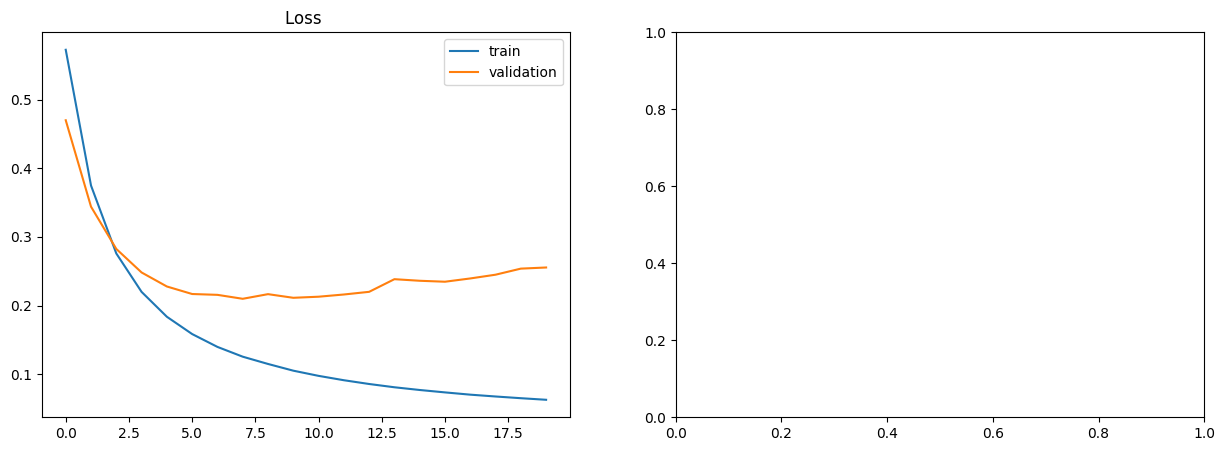

100%|███████████████████████████████████████████| 20/20 [02:48<00:00,  8.43s/it]


RetrieverDouble(
  (score_model): LinearScore(
    (fc): Linear(in_features=20000, out_features=2, bias=True)
  )
  (model_quest): TFIDFNet()
  (model_doc): TFIDFNet()
)

In [489]:
Instruments.train_tfidf_linear_score(base_retriever, train_dataloader, val_dataloader, 
                                     optimizer, criterion, epochs = 20, every_batch = 1)

In [490]:
with torch.no_grad():
    y_preds, y_gt = Instruments.test_loop(base_retriever, test_dataloader, Instruments.unpack_retriever_tfidf)

In [491]:
y_probas, y_gt = torch.concat(y_preds), torch.concat(y_gt)

In [492]:
y_probas.shape, y_gt.shape

(torch.Size([3501, 2]), torch.Size([3501]))

In [493]:
roc_auc_score(y_gt.detach().numpy(), y_probas.detach().numpy().argmax(1))

0.9305752223008891